In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
!pip install keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [101]:
google_df = pd.read_csv('Google Data.csv')

In [102]:
google_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/19/2004,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,8/20/2004,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,8/23/2004,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,8/24/2004,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,8/25/2004,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [103]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [104]:
google_df['Date'] = pd.to_datetime(google_df['Date'])
google_df['Date'] = google_df['Date'].astype('int64') // 10**9                                     


In [105]:
#Rescale our values for better result/performances
sc = MinMaxScaler(feature_range=(0,1))
google_df = sc.fit_transform(google_df)
google_df.shape


(4431, 7)

In [106]:
X_train = []
y_train = []
for i in range (60,1149): #60 : timestep//1149 : Length of the data
    X_train.append(google_df[i-60:i,0])
    y_train.append(google_df[i,0])
    
X_train,y_train = np.array(X_train),np.array(y_train)

In [107]:
#Adding the batch_size axis
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1089, 60, 1)

In [108]:
#Building Long Short Term Memory Model (LSTM)
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [109]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 16s - loss: 0.0033 - 16s/epoch - 456ms/step
Epoch 2/20
35/35 - 7s - loss: 1.5205e-04 - 7s/epoch - 189ms/step
Epoch 3/20
35/35 - 7s - loss: 1.2018e-04 - 7s/epoch - 189ms/step
Epoch 4/20
35/35 - 7s - loss: 1.3362e-04 - 7s/epoch - 188ms/step
Epoch 5/20
35/35 - 7s - loss: 1.3273e-04 - 7s/epoch - 188ms/step
Epoch 6/20
35/35 - 7s - loss: 1.5628e-04 - 7s/epoch - 192ms/step
Epoch 7/20
35/35 - 7s - loss: 1.0627e-04 - 7s/epoch - 187ms/step
Epoch 8/20
35/35 - 7s - loss: 1.1212e-04 - 7s/epoch - 195ms/step
Epoch 9/20
35/35 - 7s - loss: 9.7114e-05 - 7s/epoch - 193ms/step
Epoch 10/20
35/35 - 7s - loss: 9.9039e-05 - 7s/epoch - 188ms/step
Epoch 11/20
35/35 - 7s - loss: 9.4825e-05 - 7s/epoch - 188ms/step
Epoch 12/20
35/35 - 7s - loss: 7.8734e-05 - 7s/epoch - 188ms/step
Epoch 13/20
35/35 - 7s - loss: 8.8749e-05 - 7s/epoch - 188ms/step
Epoch 14/20
35/35 - 7s - loss: 1.0151e-04 - 7s/epoch - 187ms/step
Epoch 15/20
35/35 - 7s - loss: 9.2388e-05 - 7s/epoch - 190ms/step
Epoch 16/20
35/35 - 7

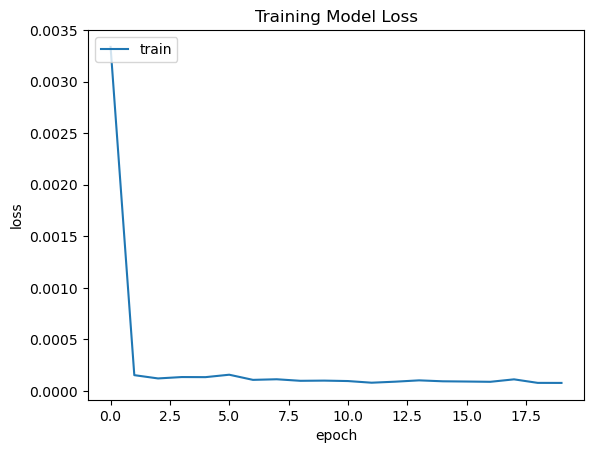

In [110]:
plt.plot(hist.history['loss'])
plt.title('Training Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

In [148]:
sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(inputClosing)

MinMaxScaler()

In [149]:
sc = MinMaxScaler(feature_range=(0,1))
google_df = sc.fit_transform(google_df)
google_df.shape

(4431, 1)

In [150]:
X_test = []
length = len(google_df)
timestep = 60 
for i in range(timestep, length):
    X_test.append(inputClosing_scaled[i-timestep:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(4371, 60, 1)

In [151]:
y_pred = model.predict(X_test)

137/137 [==============================] - 13s 75ms/step


In [152]:
y_pred

array([[0.0194164 ],
       [0.01964222],
       [0.01986792],
       ...,
       [0.9494756 ],
       [0.94964254],
       [0.949809  ]], dtype=float32)

In [153]:
predicted_price = sc.inverse_transform(y_pred)

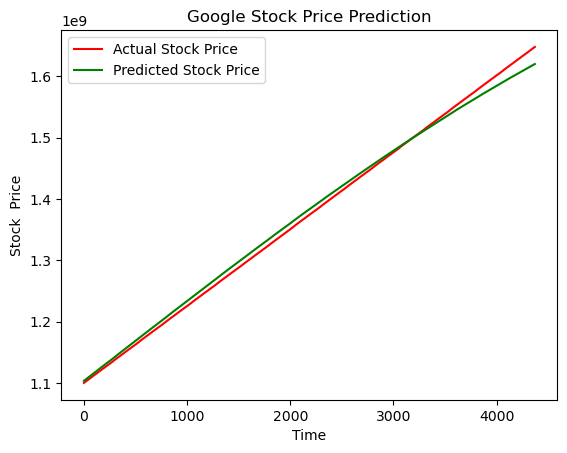

In [154]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock  Price')
plt.legend()
plt.show()